For this project, I will be analyzing data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.


Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?
What is the distribution of that life expectancy?

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


In [70]:
expectancy= pd.read_csv('life_expectancy_gdp.csv')
expectancy.head(5)


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [118]:
#Manipulate the data to get the life expectancy values for each country over time. 
life_expectancy_grouped = expectancy.groupby(['Country', 'Year']).mean().reset_index()

#Pivot the data so that each nation has its own column, and the rows are the years.
pivoted = life_expectancy_grouped.pivot(
    columns= 'Country',
    index= 'Year',
    values= 'Life expectancy at birth (years)'
)

pivoted

Country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
Year,,,,,,
2000,77.3,71.7,78.0,74.8,76.8,46.0
2001,77.3,72.2,78.3,75.0,76.9,45.3
2002,77.8,72.7,78.4,75.0,77.0,44.8
2003,77.9,73.1,78.5,75.0,77.2,44.5
2004,78.0,73.5,79.1,75.4,77.5,44.3
2005,78.4,73.9,79.2,75.3,77.5,44.6
2006,78.9,74.2,79.6,75.8,77.8,45.4
2007,78.9,74.4,79.8,76.0,78.1,46.6
2008,79.6,74.5,79.9,75.6,78.2,48.2


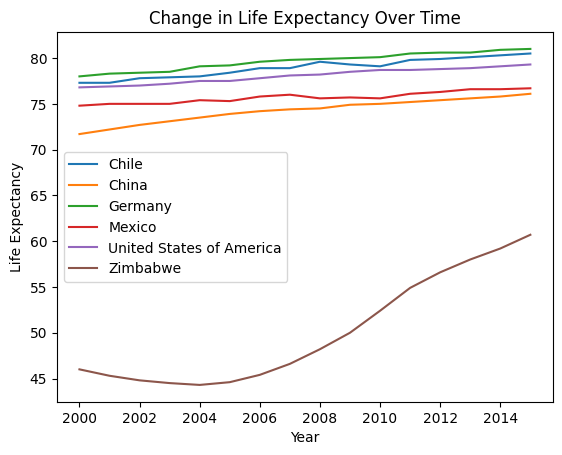

In [121]:
#Calculate the percentage change in life expectancy for each nation between the first and last year in the dataset. 
pct_change = pivoted.pct_change()
result = pct_change.iloc[[0,-1]].apply(lambda x: x>0 )
result


for country in pivoted.columns:
    plt.plot(pivoted.index, pivoted[country], label= country)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Change in Life Expectancy Over Time')
plt.show()

Results show that the life expectancy has increased for all Countries during the period of 15 years.

Has GDP increased over time in the six nations?

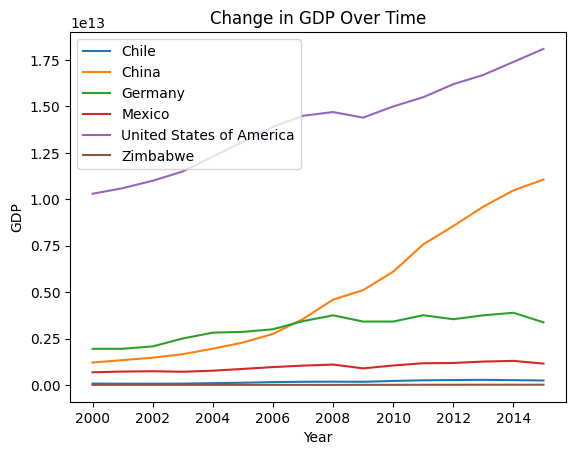

In [80]:
gdp_increase = expectancy.groupby(['Country', 'Year'])['GDP'].mean().reset_index()
gdp_increase = gdp_increase.fillna(0) # Replace NaN values with zeros
pivoted_gdp = gdp_increase.pivot(
    columns='Country',
    index='Year',
    values='GDP'
)
pct_change_gdp = pivoted_gdp.pct_change()
result_gdp = pct_change_gdp.iloc[[0,-1]].apply(lambda x: x>0 )
result_gdp

#Result show that the life expectancy has increased for all Countries during the period of 15 year.
for country in pivoted_gdp.columns:
    plt.plot(pivoted_gdp.index, pivoted_gdp[country], label= country)

plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Change in GDP Over Time')
plt.show()



Line graphs above show that during the period of 15 years, China and USA's GDP has significantly increased, Germany and Mexico have seen a slight increase, while Zimbabwe and Chile remained almost stagnant.

Is there a correlation between GDP and life expectancy of a country?

In [95]:
for country in pivoted.columns:
    corr, p = pearsonr(pivoted[country], pivoted_gdp[country])

    print(f"Correlation between GDP and life expectancy for {country}: {corr:.2f}")
    

Correlation between GDP and life expectancy for Chile: 0.95
Correlation between GDP and life expectancy for China: 0.91
Correlation between GDP and life expectancy for Germany: 0.93
Correlation between GDP and life expectancy for Mexico: 0.93
Correlation between GDP and life expectancy for United States of America: 0.98
Correlation between GDP and life expectancy for Zimbabwe: 0.97


Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.
We can conclude that there is a strong positive correlation between the GDP and life expectancy growth

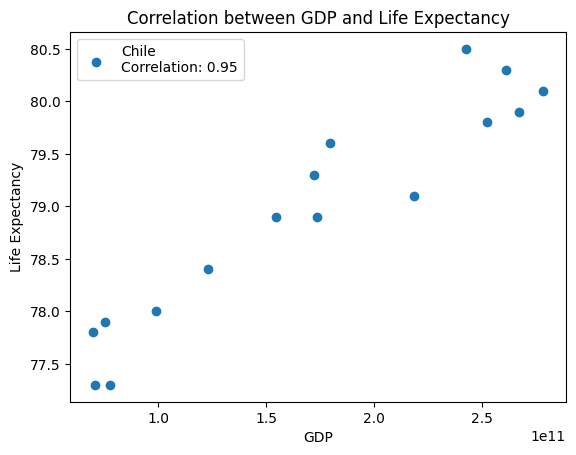

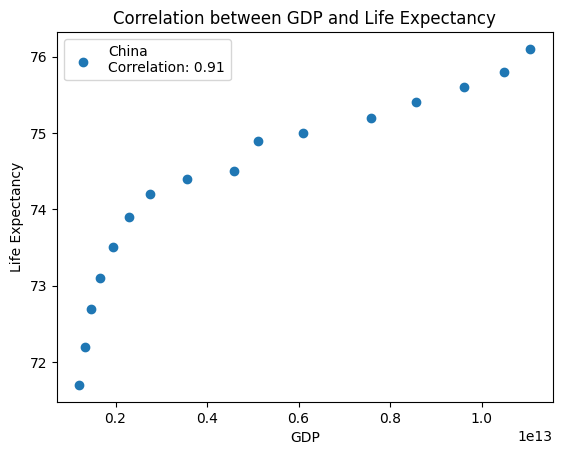

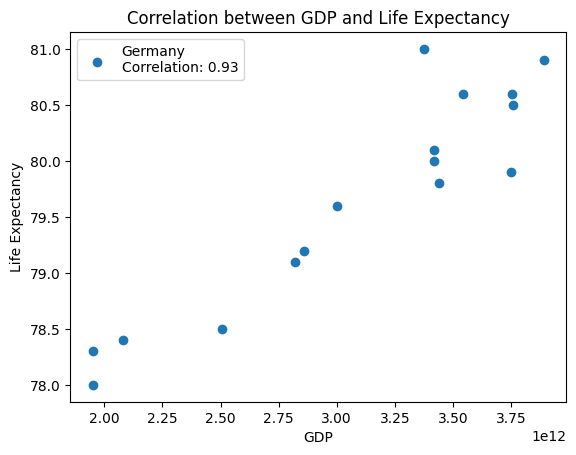

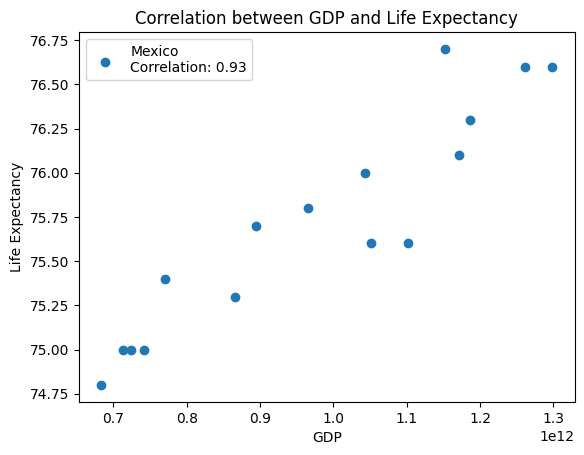

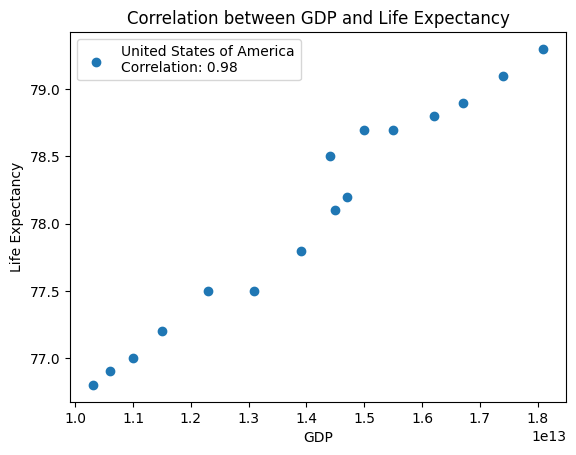

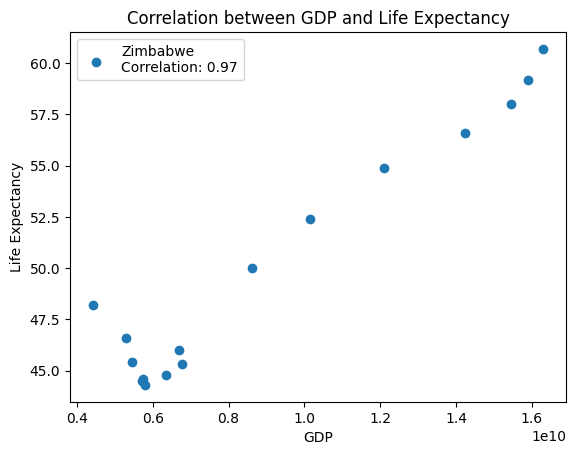

In [96]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

for country in countries:
    data = expectancy[expectancy['Country'] == country]
    correlation, p = pearsonr(data['GDP'], data['Life expectancy at birth (years)'])
    plt.scatter(data['GDP'], data['Life expectancy at birth (years)'], label=f'{country}\nCorrelation: {correlation:.2f}')
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.title('Correlation between GDP and Life Expectancy')
    plt.legend()
    plt.show()


What is the average life expectancy in each country?

In [99]:
round(pivoted.mean())

Country
Chile                       79.0
China                       74.0
Germany                     80.0
Mexico                      76.0
United States of America    78.0
Zimbabwe                    50.0
dtype: float64

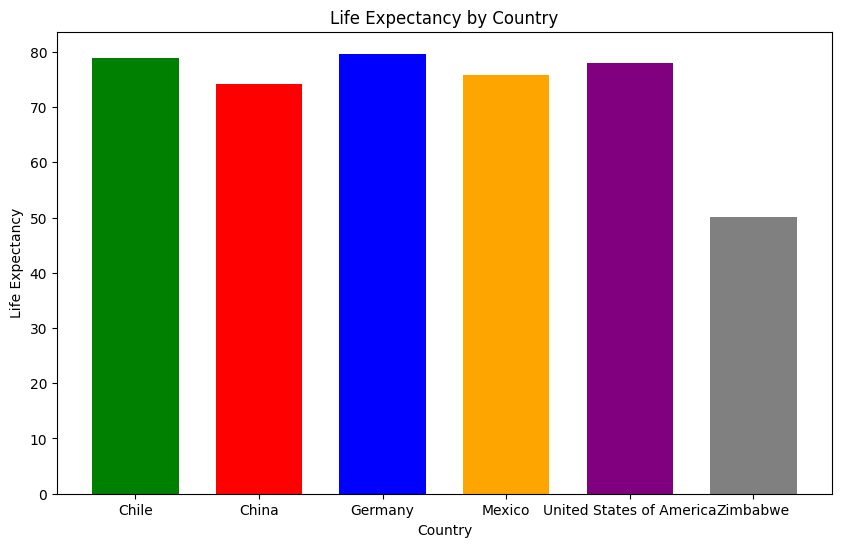

In [111]:
life_expectancy = []
for value in pivoted.mean():
    life_expectancy.append(value)

ig, ax = plt.subplots(figsize=(10, 6))  
bars = ax.bar(countries, life_expectancy, width=0.7, color=['green', 'red', 'blue', 'orange', 'purple', 'gray'])
ax.set_xlabel('Country')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy by Country')
plt.show()

What is the distribution of that life expectancy?

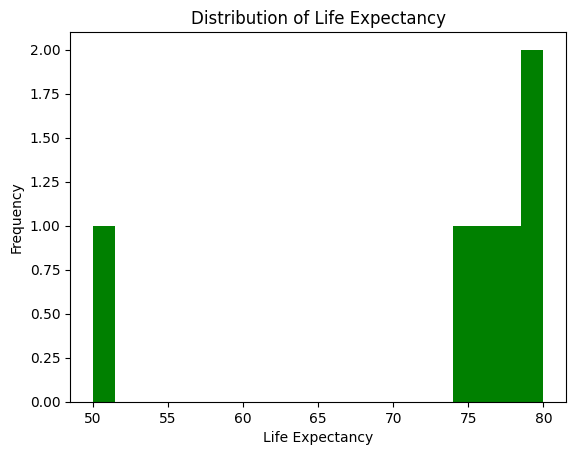

In [115]:
plt.hist(life_expectancy, bins=20, color='green')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

Most averages are concentrated in the high 70s. The outlier is Zimbabwe, where the GDP and its growth has been the lowest. As we have concluded above, there is a strong correlation between the GDP and life expectancy. Hence, the lower the GDP is in Zimbabwe, the shorter the life expectancy is.

Overall, the results suggest that there is a strong relationship between economic development, as measured by GDP, and the well-being of populations, as measured by life expectancy. However, it should be noted that correlation does not imply causation and further research is needed to understand the complex relationship between these two variables.